In [1]:
import json
import cv2
import os
import yolo
import matplotlib.pyplot as plt
from yolo.frontend import create_yolo
from yolo.backend.utils.box import draw_scaled_boxes

C:\Users\athit\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\athit\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\athit\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\athit\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [2]:
yolo_detector = create_yolo("ResNet50", ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], 416)

W0625 10:20:07.873581 19696 deprecation_wrapper.py:119] From C:\Users\athit\AppData\Roaming\Python\Python37\site-packages\keras\backend\tensorflow_backend.py:63: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0625 10:20:07.890583 19696 deprecation_wrapper.py:119] From C:\Users\athit\AppData\Roaming\Python\Python37\site-packages\keras\backend\tensorflow_backend.py:492: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0625 10:20:07.893576 19696 deprecation_wrapper.py:119] From C:\Users\athit\AppData\Roaming\Python\Python37\site-packages\keras\backend\tensorflow_backend.py:3630: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0625 10:20:07.957269 19696 deprecation_wrapper.py:119] From C:\Users\athit\AppData\Roaming\Python\Python37\site-packages\keras\backend\tensorflow_backend.py:3458: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0625 1

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 416, 416, 3)  0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 208, 208, 64) 9472        input_1[0][0]                    
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 208, 208, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 208, 208, 64) 0           bn_conv1[0][0]                   
__________________________________________________________________________________________________
max_poolin

In [3]:
%matplotlib inline  
DEFAULT_WEIGHT_FILE = os.path.join(yolo.PROJECT_ROOT, "weights.h5")
yolo_detector.load_weights(DEFAULT_WEIGHT_FILE)

Loading pre-trained weights in C:\Users\athit\Desktop\For Submission\Character recognition\weights.h5


3-boxes are detected.


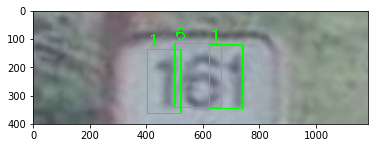

In [6]:
DEFAULT_IMAGE_FOLDER = os.path.join(yolo.PROJECT_ROOT,"imgs")
img_files = [os.path.join(DEFAULT_IMAGE_FOLDER, "161.jpg")]
imgs = []
for fname in img_files:
    img = cv2.imread(fname)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    imgs.append(img)
THRESHOLD = 0.5
for img in imgs:
    boxes, probs = yolo_detector.predict(img, THRESHOLD)
    image = draw_scaled_boxes(img,
                              boxes,
                              probs,
                              ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"])
    print("{}-boxes are detected.".format(len(boxes)))
    plt.imshow(image)
    plt.show()

In [7]:
probs

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.71299946, 0.        , 0.        , 0.        ],
       [0.        , 0.5240391 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.5916414 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]],
      dtype=float32)